## **Predicting Plant Health Using Machine Learning Models**


- In this notebook, I aim to develop a predictive model to monitor and analyze plant health based on various environmental parameters. This initiative is a part of the smart planter project which is designed to assist both home gardeners and farmers in optimizing their yield and minimizing waste. The predictive model will utilize machine learning algorithms to analyze data from various sensors and predict the health of the plant.

### **Dataset Description**

- The dataset contains the following attributes:

   - **Humidity (%):** The percentage of water vapor present in the air surrounding the plants.
   - **Nitrogen Levels (mg/kg):** The concentration of nitrogen in the soil, measured in milligrams per kilogram.
   - **Ambient Temperature (°C):** The surrounding temperature measured in degrees Celsius.
   - **Presence of Sunlight:** A binary attribute indicating whether the plant is exposed to sunlight.
   - **Plant Health:** The target variable indicating the health status of the plant.

In [69]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score,classification_report, roc_auc_score,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve

### **Data Simulation Function: generate_data**

- This function simulates the generation of a dataset with 10000 data points, which are equally distributed across three categories: 'Healthy', 'Moderate', and 'Unhealthy'. These categories represent different states of plant health. The attributes for each data point include 'Humidity (%)', 'Nitrogen Levels (mg/kg)', 'Ambient Temperature (°C)', 'Presence of Sunlight', and 'Plant Health'. The values of these attributes are generated based on certain conditions defined for each category to simulate real-world scenarios.

- **Parameters**
   - n: The total number of data points to be generated. It is set to 10000 by default.
- **Returns**
   - df: A shuffled pandas DataFrame containing the generated data points with their respective attributes.

In [3]:
# Number of data points
n = 10000

# Simulate data collection
def generate_data(n):
    data = {
        'Humidity (%)': [],
        'Nitrogen Levels (mg/kg)': [],
        'Ambient Temperature (°C)': [],
        'Presence of Sunlight': [],
        'Plant Health': []
    }
    
    # Generate a third of the data for each category
    for category in ['Healthy', 'Moderate', 'Unhealthy']:
        for _ in range(n // 3):
            if category == 'Healthy':
                data['Humidity (%)'].append(random.uniform(50, 70))
                data['Nitrogen Levels (mg/kg)'].append(random.uniform(100, 150))
                data['Ambient Temperature (°C)'].append(random.uniform(15, 25))
                data['Presence of Sunlight'].append(1)
                data['Plant Health'].append('Healthy')
            elif category == 'Moderate':
                data['Humidity (%)'].append(random.uniform(40, 80))
                data['Nitrogen Levels (mg/kg)'].append(random.uniform(80, 170))
                data['Ambient Temperature (°C)'].append(random.uniform(10, 30))
                data['Presence of Sunlight'].append(random.choice([0, 1]))
                data['Plant Health'].append('Moderate')
            else:
                data['Humidity (%)'].append(random.uniform(0, 100))
                data['Nitrogen Levels (mg/kg)'].append(random.uniform(0, 200))
                data['Ambient Temperature (°C)'].append(random.uniform(-10, 40))
                data['Presence of Sunlight'].append(random.choice([0, 1]))
                data['Plant Health'].append('Unhealthy')
    
    # Create a DataFrame and shuffle it
    df = pd.DataFrame(data)
    df = df.sample(frac=1).reset_index(drop=True)
    
    return df

df = generate_data(n)

In [4]:
df.head(10)

,Humidity (%),Nitrogen Levels (mg/kg),Ambient Temperature (°C),Presence of Sunlight,Plant Health
0,68.031413,133.828659,19.398839,1,Healthy
1,56.730508,111.590247,33.227743,1,Unhealthy
2,61.742981,136.741891,17.204645,1,Healthy
3,16.556540,163.975525,0.706655,0,Unhealthy
4,77.764123,197.997788,22.787443,0,Unhealthy
5,78.863612,137.627394,27.704854,0,Moderate
6,57.245981,103.282572,21.622807,1,Healthy
7,75.481046,114.149872,29.841136,0,Moderate
8,34.131883,64.904187,5.032788,1,Unhealthy
9,57.982781,137.600939,15.917014,1,Healthy


In [13]:
# Save to CSV
#df.to_csv('plant_health_dataset.csv', index=False)

### **Loading the Dataset**

In [17]:
# Read CSV
df = pd.read_csv('plant_health_dataset.csv')

### **Data Preprocessing**
- Perform necessary data preprocessing steps here
- For instance, handling missing values, encoding categorical variables, etc.

In [4]:
# Handle the missing data if exists
df = df.dropna()

In [19]:
# Encode the categorical data
le = LabelEncoder()
df['Plant Health'] = le.fit_transform(df['Plant Health'])

### **Exploratory Data Analysis**
- Perform exploratory data analysis here
- For instance, using seaborn or matplotlib to visualize the data

<Axes: >

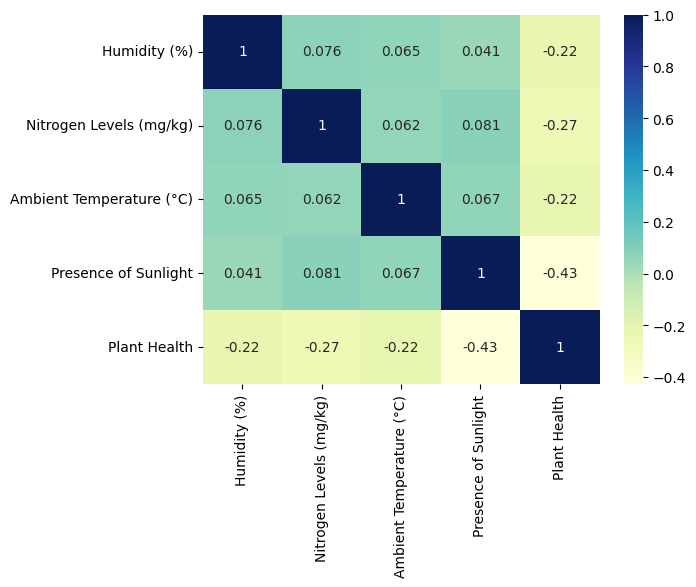

In [25]:
# Visualize the correlation
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

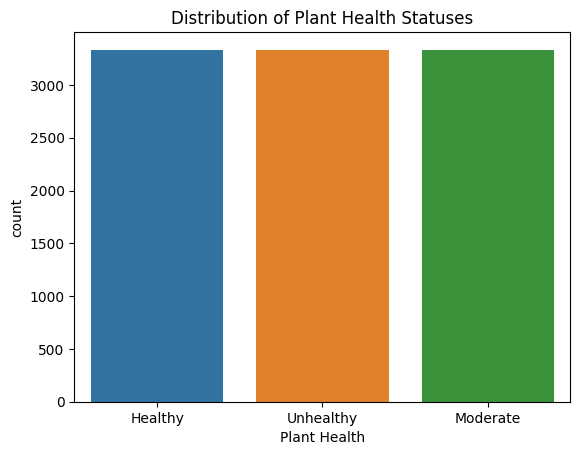

In [21]:
# Create a temporary series with replaced values
temp_series = df['Plant Health'].replace({0: 'Healthy', 1: 'Moderate', 2: 'Unhealthy'})

# Plot the distribution of plant health statuses
sns.countplot(x=temp_series)
plt.title('Distribution of Plant Health Statuses')
plt.show()

### **Model Development**
- In this section, I will develop multiple machine learning models and will compare the results of predict plant health based on the features provided.

#### **Splitting & Scaling the Data**
- Split the dataset into the 80 percent training and 20 percent testing

In [26]:
# Split the data into training and testing sets
X = df.drop('Plant Health', axis=1)
y = df['Plant Health']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Feature Scaling


In [27]:
# Normalize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### **Model 1: Building Neural Networks**

In [92]:
# Import required libraries
from keras.models import Sequential
from keras.layers import Dropout, BatchNormalization, Dense
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras.optimizers import Nadam

In [94]:
# Build a more powerful neural network using a library like TensorFlow
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer='l2'),
    Dropout(0.3),
    BatchNormalization(),
    
    Dense(128, activation='relu', kernel_regularizer='l2'),
    Dropout(0.3),
    BatchNormalization(),
    
    Dense(64, activation='relu', kernel_regularizer='l2'),
    Dropout(0.3),
    BatchNormalization(),
    
    Dense(3, activation='softmax')
])

# Compile the model with an advanced optimizer
optimizer = Nadam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Implement early stopping and learning rate reduction on plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

In [95]:
# Train the model
history = model.fit(X_train, y_train, epochs=300, batch_size=64, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Epoch 1/300


100/100 [==============================] - 3s 8ms/step - loss: 2.9549 - accuracy: 0.7220 - val_loss: 2.6721 - val_accuracy: 0.7175 - lr: 0.0010
Epoch 2/300
100/100 [==============================] - 0s 4ms/step - loss: 1.9542 - accuracy: 0.8301 - val_loss: 1.9694 - val_accuracy: 0.4650 - lr: 0.0010
Epoch 3/300
100/100 [==============================] - 0s 4ms/step - loss: 1.3611 - accuracy: 0.8372 - val_loss: 1.3957 - val_accuracy: 0.6575 - lr: 0.0010
Epoch 4/300
100/100 [==============================] - 0s 4ms/step - loss: 0.9708 - accuracy: 0.8511 - val_loss: 1.0152 - val_accuracy: 0.7181 - lr: 0.0010
Epoch 5/300
100/100 [==============================] - 0s 4ms/step - loss: 0.7501 - accuracy: 0.8609 - val_loss: 0.7005 - val_accuracy: 0.8594 - lr: 0.0010
Epoch 6/300
100/100 [==============================] - 0s 4ms/step - loss: 0.6221 - accuracy: 0.8628 - val_loss: 0.5756 - val_accuracy: 0.8756 - lr: 0.0010
Epoch 7/300
100/100 [==============================] - 0s 4ms/step - loss: 0

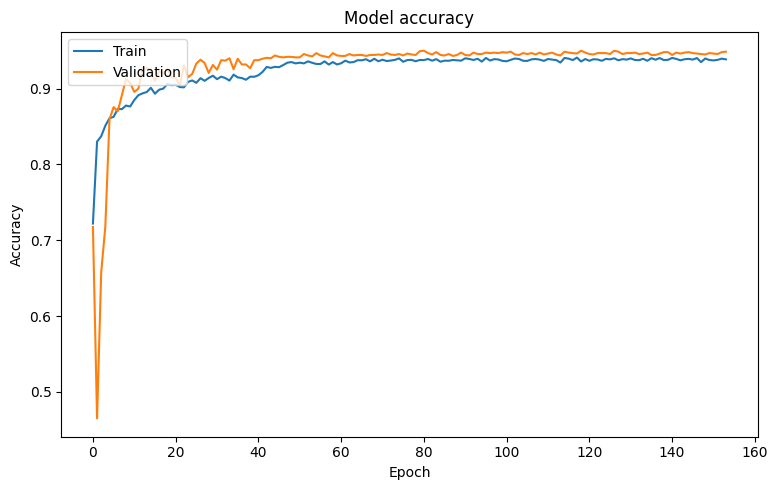

In [96]:
# Plot training & validation accuracy values
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

In [97]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')


63/63 [==============================] - 0s 2ms/step - loss: 0.2316 - accuracy: 0.9430
Test Accuracy: 0.9430000185966492


In [98]:
# Making predictions on new data
new_data = [[61.007023, 106.570495, 21.414754, 1]]  # Example data
new_data = scaler.transform(new_data)  # Normalize the data
predictions = model.predict(new_data)
predicted_label = le.inverse_transform([np.argmax(predictions)])  # Convert back to original label
print(f'Predicted Label: {predicted_label[0]}')


1/1 [==============================] - ETA: 0s

C:\Users\jawad2019.namal\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 138ms/step
Predicted Label: Healthy


### **Model 2: Training a Tuned Logistic Regression Model with Class Weights**

In [29]:
from sklearn.linear_model import LogisticRegression

In [66]:
ltuw = LogisticRegression(max_iter=5000,class_weight={0:1,1:1,2:1},C=100,fit_intercept=True,
                               penalty='l2',solver='newton-cg')
ltuw.fit(X_train, y_train)

LogisticRegression(C=100, class_weight={0: 1, 1: 1, 2: 1}, max_iter=5000,
                   solver='newton-cg')

In [67]:
y_pred = ltuw.predict(X_test)
acc = accuracy_score(y_test, y_pred)
creport = classification_report(y_test, y_pred)
print(f'Accuracy Score is: {acc}')
print(creport)

Accuracy Score is: 0.638
              precision    recall  f1-score   support

           0       0.57      1.00      0.73       652
           1       0.68      0.37      0.48       695
           2       0.76      0.56      0.64       653

    accuracy                           0.64      2000
   macro avg       0.67      0.64      0.62      2000
weighted avg       0.67      0.64      0.61      2000



### **Model 3: Training a Tuned Random Forest Model with Class Weights**

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
rfc_tuned = RandomForestClassifier(random_state=1, n_jobs=-1, class_weight={0:1, 1:1, 2:1}, criterion='gini', max_depth= 6, min_samples_split= 12, n_estimators= 400, warm_start=True)
rfc_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 1, 2: 1}, max_depth=6,
                       min_samples_split=12, n_estimators=400, n_jobs=-1,
                       random_state=1, warm_start=True)

In [74]:
y_pred = rfc_tuned.predict(X_test)
acc = accuracy_score(y_test, y_pred)
creport = classification_report(y_test, y_pred)
print(f'Accuracy Score is: {acc}')
print(creport)

Accuracy Score is: 0.9295
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       652
           1       0.91      0.89      0.90       695
           2       1.00      0.90      0.95       653

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



### **Model 4: Training a Tuned XGBoost Classifier Model with Class Weights**

In [76]:
from xgboost import XGBClassifier

In [84]:
xgb_tuned = XGBClassifier(eval_metric = 'logloss', seed =0, 
               objective='binary:logistic',  booster='dart',
              eta=0.01, max_depth=3, n_estimators=150)
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.01, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=150,
              n_jobs=None, num_parallel_tree=None, ...)

In [85]:
y_pred = xgb_tuned.predict(X_test)
acc = accuracy_score(y_test, y_pred)
creport = classification_report(y_test, y_pred)
print(f'Accuracy Score is: {acc}')
print(creport)

Accuracy Score is: 0.859
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       652
           1       0.87      0.74      0.80       695
           2       1.00      0.85      0.92       653

    accuracy                           0.86      2000
   macro avg       0.88      0.86      0.86      2000
weighted avg       0.88      0.86      0.86      2000

